In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 33)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape #形状

(10683, 11)

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
col = df.columns.tolist()
col

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [7]:
df.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


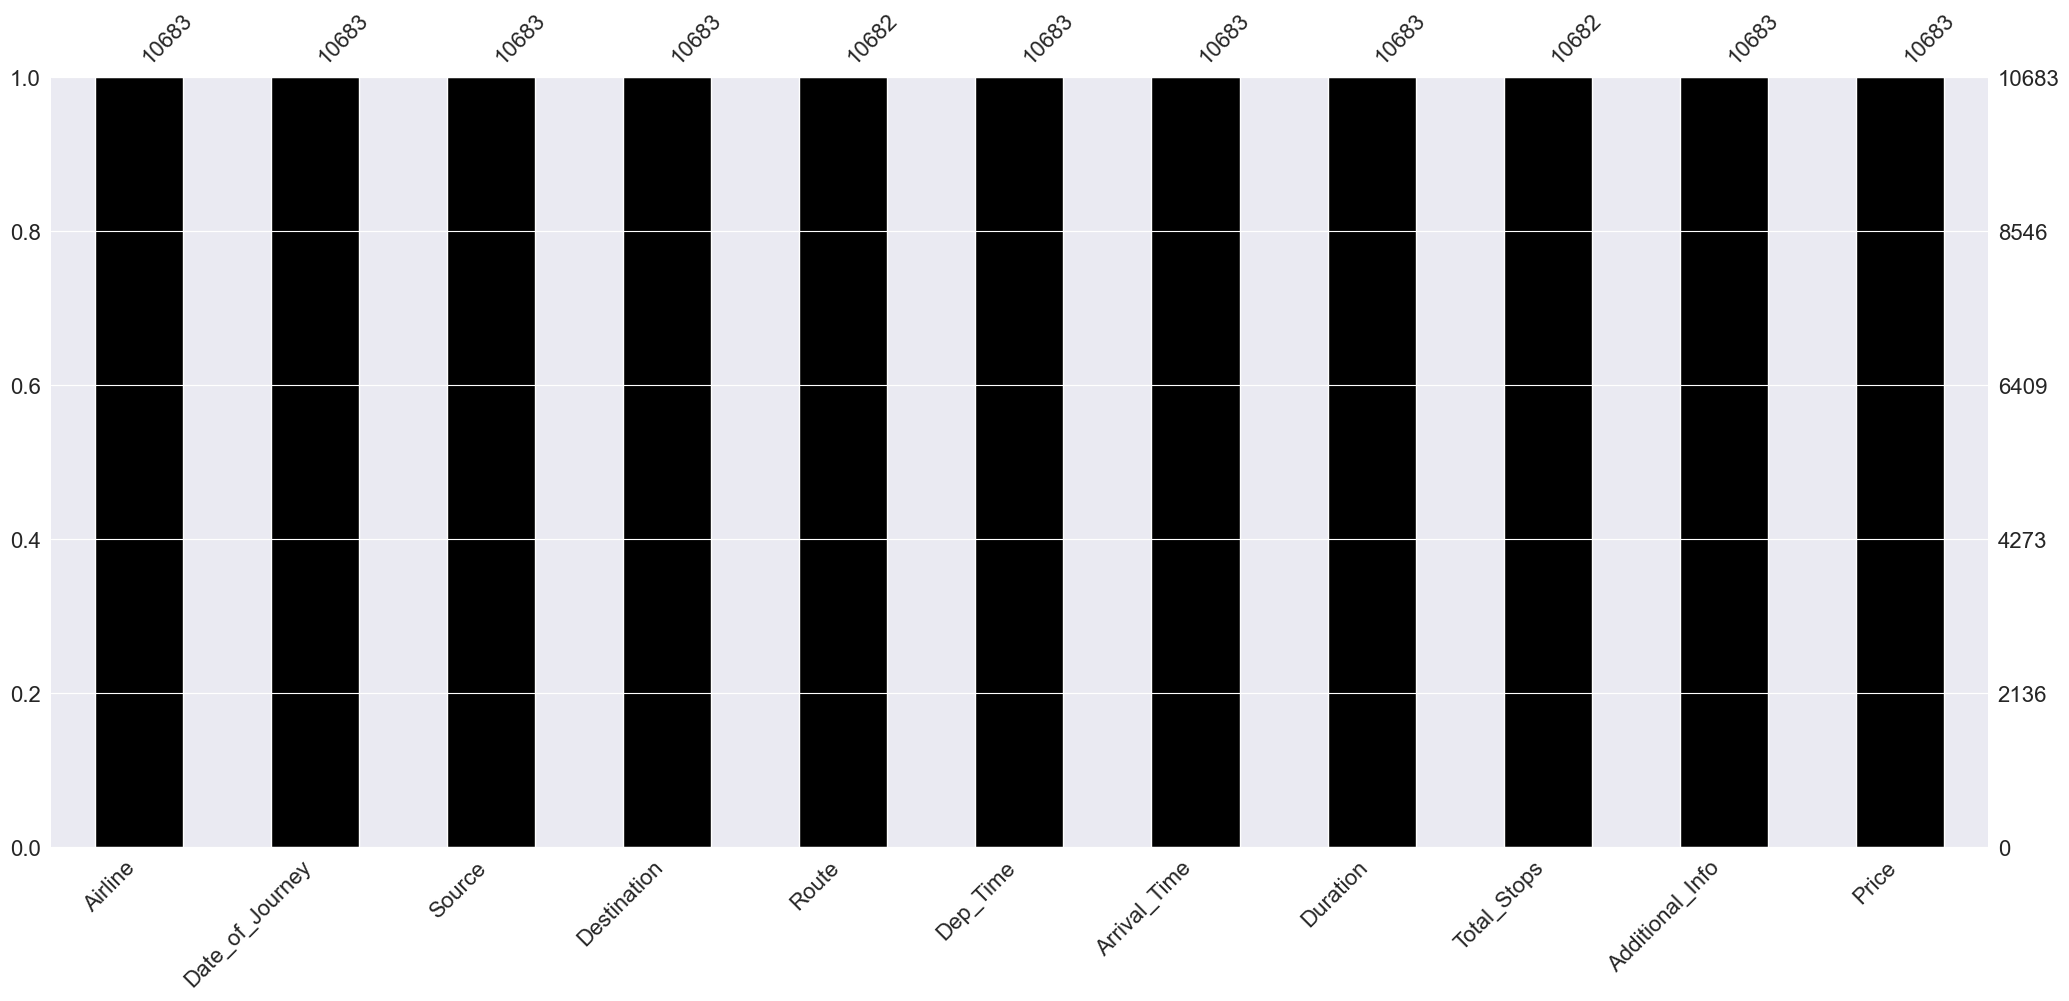

In [9]:
import missingno as mso
mso.bar(df, color='black')
plt.show()

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
def change_to_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [13]:
for col in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_datetime(col)

In [14]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
df['day'] = df['Date_of_Journey'].dt.day
df['month'] = df['Date_of_Journey'].dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-10-09 18:05:00,2023-10-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-10-09 16:50:00,2023-10-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-09 05:50:00,2023-10-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-09 18:05:00,2023-10-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-09 16:50:00,2023-10-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
def extract_hour(data, col):
    data[col + '_hour'] = data[col].dt.hour
def extract_minute(data, col):
    data[col + '_minute'] = data[col].dt.minute
def drop_col(data, col):
    data.drop(col, axis=1, inplace=True)

In [19]:
extract_hour(df,'Dep_Time')
extract_minute(df,'Dep_Time')
drop_col(df,'Dep_Time')  # 删除原字段

extract_hour(df,'Arrival_Time')
extract_minute(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
dur = list(df['Duration'])

In [21]:
# for i in range(len(dur)):
#     if len(dur[i].split(' ')) == 2:
#         pass
#     else:
#         if 'h' in dur[i]:
#             dur[i] = dur[i] + ' 0m'
#         else:
#             dur[i] = '0h ' + dur[i]
            
def change_Duration(x):
    if 'h' in x and 'm' in x:
        return x
    else:
        if 'h' in x:
            return x + ' 0m'
        else:
            return '0h ' + x
            

In [22]:
# df['Duration'] = dur
df['Duration'] = df['Duration'].apply(change_Duration)

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
df1 = df['Duration'].str.extract(r'(?P<dur_hour>\d+)h (?P<dur_minute>\d+)m')
df1

,dur_hour,dur_minute
0,2,50
1,7,25
2,19,0
3,5,25
4,4,45
...,...,...
10678,2,30
10679,2,35
10680,3,0
10681,2,40


In [25]:
df = df.join(df1)
df.drop('Duration', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
day                     int64
month                   int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
dur_hour               object
dur_minute             object
dtype: object

In [27]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_minute'] = df['dur_minute'].astype(int)

In [28]:
column = [column for column in df.columns if df[column].dtype == "object"]
column

continuous_col = [column for column in df.columns if df[column].dtype != "object"]
continuous_col

['Price',
 'day',
 'month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'dur_hour',
 'dur_minute']

In [29]:
cate = df[column]
cate

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [30]:
airline = cate['Airline'].value_counts().reset_index()
airline

,index,Airline
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


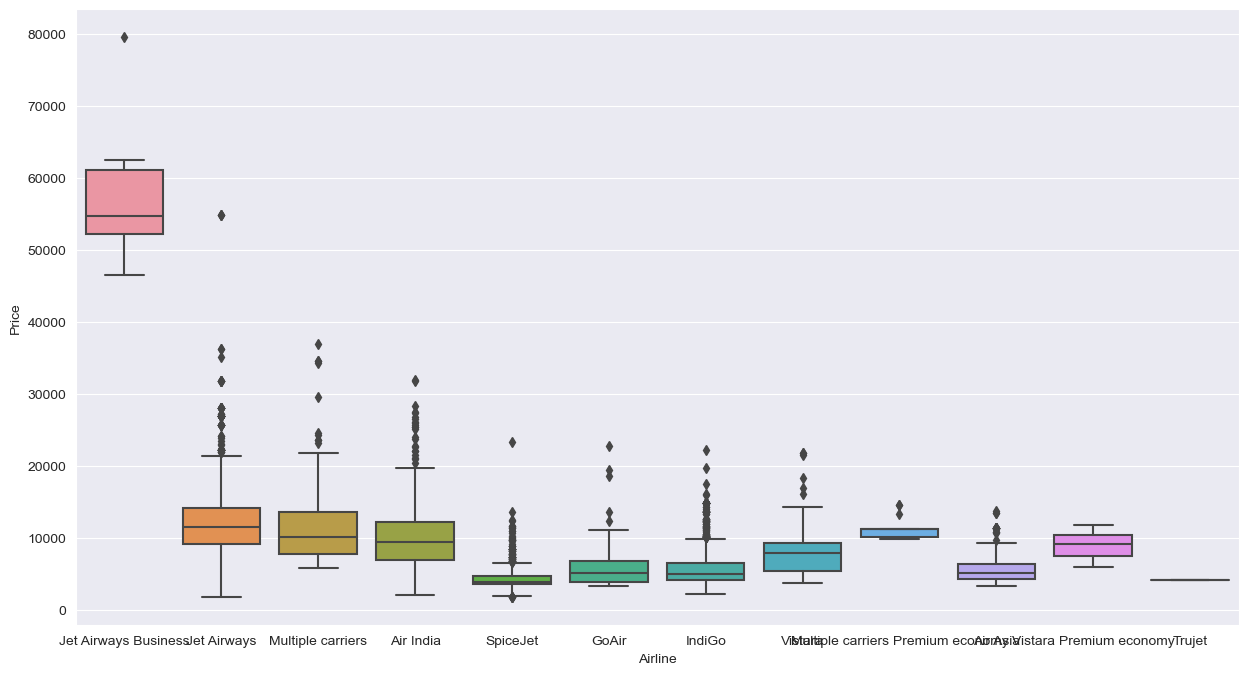

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Airline', y = 'Price', data=df.sort_values('Price', ascending=False))
plt.show()

In [32]:
Airline = pd.get_dummies(cate['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


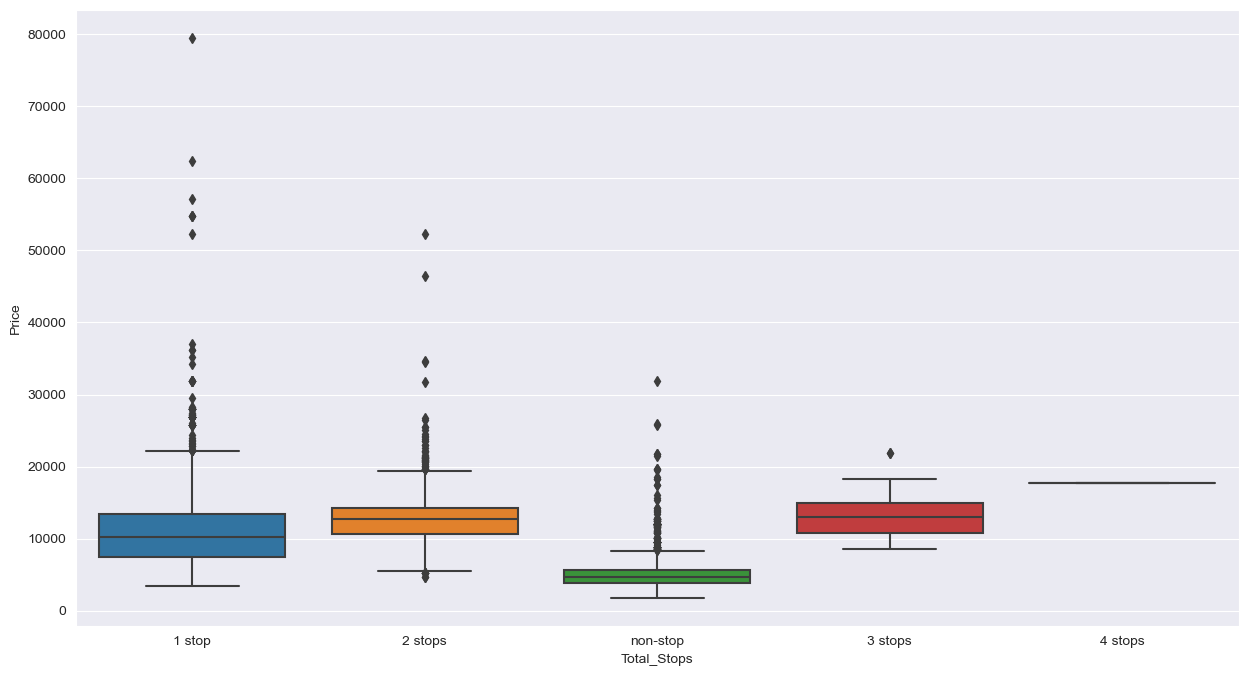

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',
            y='Price',
            data=df.sort_values('Price', ascending=False)
           )
plt.show()

In [34]:
dict_stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
cate['Total_Stops']=cate['Total_Stops'].map(dict_stops)
cate.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info


<Figure size 1500x800 with 0 Axes>

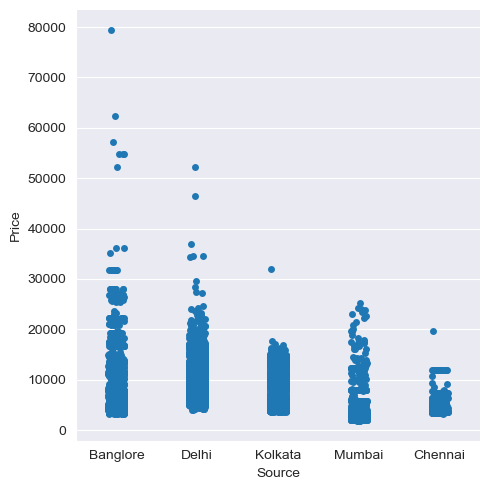

In [35]:
plt.figure(figsize=(15,8))
sns.catplot(x='Source',
            y='Price',
            data=df.sort_values('Price', ascending=False)
        )
plt.show()

In [36]:
source=pd.get_dummies(cate['Source'], drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<Figure size 1500x800 with 0 Axes>

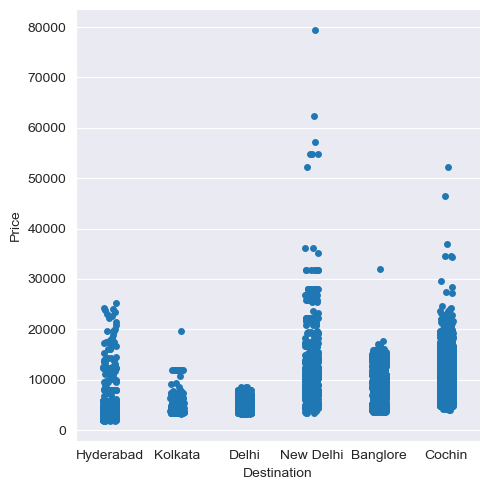

In [37]:
plt.figure(figsize=(15,8))
sns.catplot(
    x='Destination',
    y='Price',
    data=df.sort_values('Price', ascending=True)
)
plt.show()

In [38]:
destination=pd.get_dummies(cate['Destination'], drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
cate['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [40]:
cate['Route1']=cate['Route'].str.split('→').str[0]
cate['Route2']=cate['Route'].str.split('→').str[1]
cate['Route3']=cate['Route'].str.split('→').str[2]
cate['Route4']=cate['Route'].str.split('→').str[3]
cate['Route5']=cate['Route'].str.split('→').str[4]
cate.drop('Route', axis=1, inplace=True)

In [41]:
cate.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1,No info,BLR,NAG,DEL,NaN,NaN


In [42]:
cate.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [43]:
for x in ['Route3', 'Route4', 'Route5']:
     cate[x].fillna('None',inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    cate[i] = le.fit_transform(cate[i])
cate.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


<Figure size 1500x800 with 0 Axes>

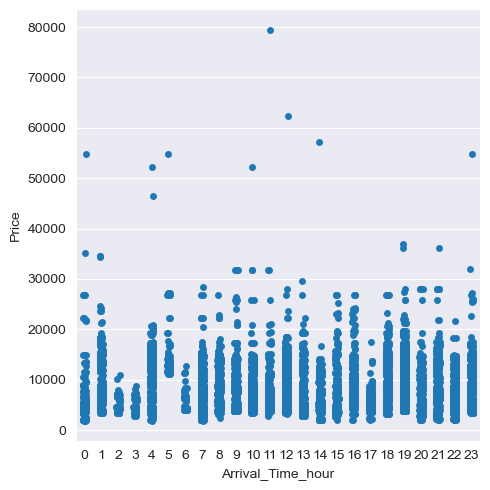

In [45]:
plt.figure(figsize=(15,8))
sns.catplot(
    x='Arrival_Time_hour',
    y='Price',
    data=df.sort_values('Price', ascending=True)
)
plt.show()

In [46]:
cate.columns.tolist()

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Route1',
 'Route2',
 'Route3',
 'Route4',
 'Route5']

In [47]:
for i in ['Additional_Info', 'Airline', 'Source', 'Destination']:
    drop_col(cate, i)


In [48]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


In [49]:
final_df=pd.concat([cate,Airline,source,destination,df[continuous_col]],axis=1)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dur_hour,dur_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [50]:
final_df.dtypes

Total_Stops                          int64
Route1                               int32
Route2                               int32
Route3                               int32
Route4                               int32
Route5                               int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

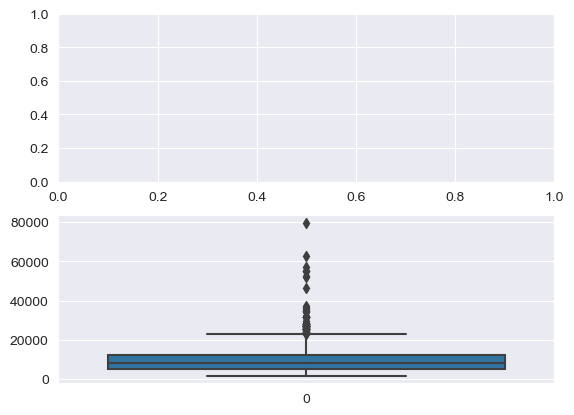

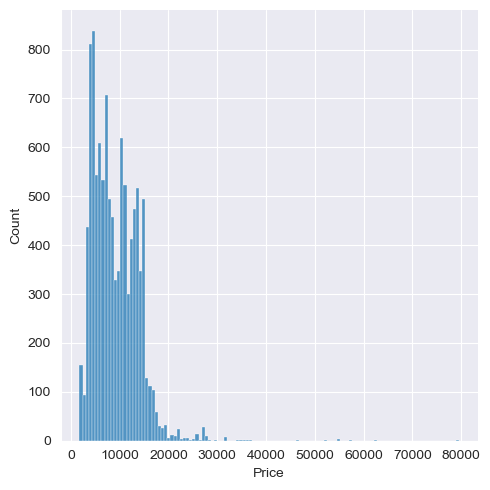

In [51]:
def plot(data, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.displot(data[col], ax=ax1)
    sns.boxplot(data[col], ax=ax2)
plot(final_df, 'Price')

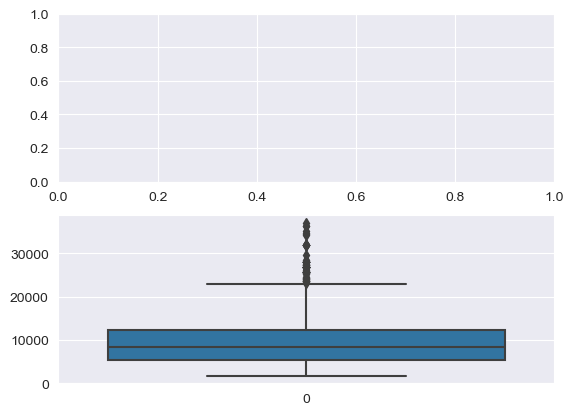

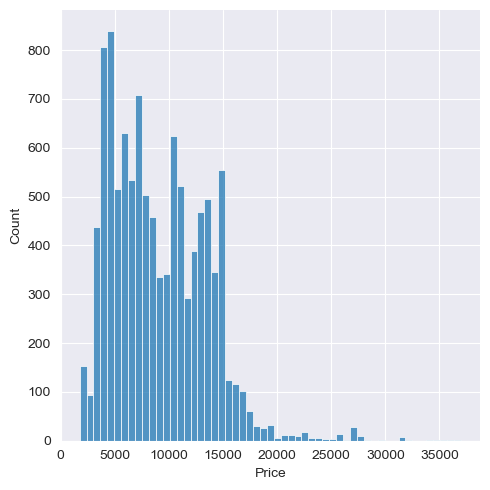

In [52]:
final_df['Price']=np.where(
    final_df['Price']>=40000,
    final_df['Price'].median(),
    final_df['Price']
)
plot(final_df, 'Price')

In [53]:
X=final_df.drop('Price',axis=1)
y=df['Price']

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.feature_selection import mutual_info_classif
# imp = pd.DataFrame(mutual_info_classif(X,y),
#                   index=X.columns)
# 
# imp.columns=['importance']
# imp.sort_values(by='importance',ascending=False)

In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def predict(ml_model):
    print("Model is: ", ml_model)
    
    model = ml_model.fit(X_train, y_train)
    
    print("Training score: ", model.score(X_train,y_train))
    
    predictions = model.predict(X_test)
    print("Predictions: ", predictions)
    print('-----------------')
    r2score = r2_score(y_test, predictions)
    print("r2 score is: ", r2score)
    
    print('MAE:{}', mean_absolute_error(y_test,predictions))
    print('MSE:{}', mean_squared_error(y_test,predictions))
    print('RMSE:{}', np.sqrt(mean_squared_error(y_test,predictions)))
    
    # 真实值和预测值的差值
    sns.distplot(y_test - predictions)

In [58]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression   
# k近邻回归
from sklearn.neighbors import KNeighborsRegressor  
# 决策树回归
from sklearn.tree import DecisionTreeRegressor  
# 梯度提升回归，随机森林回归
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor  

Model is:  KNeighborsRegressor()
Training score:  0.7492859389140516
Predictions:  [16315.   5116.6  8441.6 ...  6244.6  3572.4  6192. ]
-----------------
r2 score is:  0.5867691515262101
MAE:{} 1810.50864274571
MSE:{} 8430292.200024962
RMSE:{} 2903.4965472727813


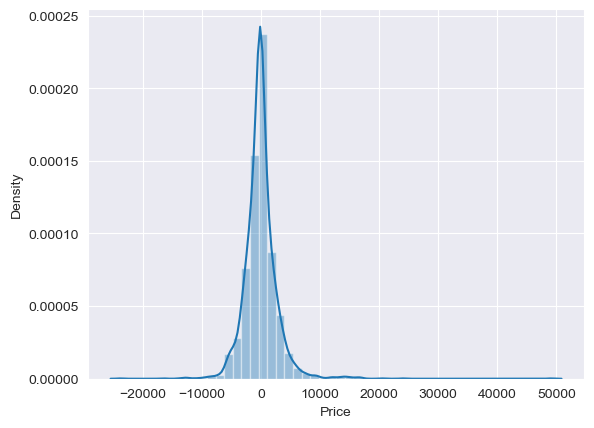

In [59]:
predict(KNeighborsRegressor())

Model is:  LogisticRegression()
Training score:  0.34813427845392536
Predictions:  [15965  5135 14939 ...  6297  3100  6442]
-----------------
r2 score is:  0.4470324159477509
MAE:{} 1973.355070202808
MSE:{} 11281051.08299532
RMSE:{} 3358.727598808114


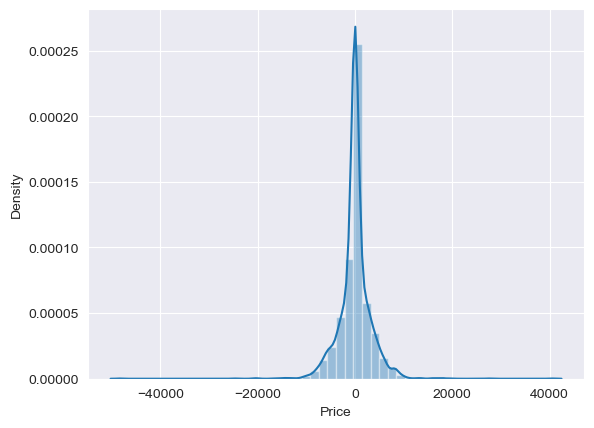

In [60]:
predict(LogisticRegression())